# Dataset

- Link of dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

# Goals & Objective

**1. ETL to Create a Data Mart**
- Extract, transform, and load multiple olist datasets from CSV to a PostgreSQL database using Psycopg2 and DuckDB to create a data mart.
- The data mart contains data from specific customer states, in this case, the highest order of customers, which is from SP (Sao Paulo).


**2. Product Sales analysis**
- Yearly and Monthly Trend Sales Analysis
  - Revenue (Line Chart)
- Top and Bottom Product Sales
  - Top 10 highest-sold products (Bar chart)
  - Top 10 lowest-sold products (Bar chart)
- Average order value (AOV)
- Product Category bought together



<!--
Goals dalam projek ini ada tiga, yaitu:
1. Analisis Annual and Monthly Revenue dan Order
- Objective: Analisis Total Revenue dan total order yang telah dilakukan setiap tahun dan bulan. Selain itu juga dilihat total revenue dan total order berdasarkan order status, payment type, top 5 city dan top 5 product category
2. Analisis Annual and Monthly Customer Activity
- Objective: Analisis rata-rata customer yang aktif, customer baru, customer repeat order dan rata-rata customer order tiap bulan dan tiap tahun.
3. Perbandingan Revenue dari Customer Baru dan Customer Repeat Order
- Objective: Membandingkan Revenue dari Customer Baru dan Customer Repeat Order -->

<!--
https://www.pipedrive.com/en/blog/sales-data

=> Analisis sales growth and customer growth

→ sales revenue
https://www.leadsquared.com/learn/sales/sales-growth/

  - Revenue & order tiap bulan-tahun & tiap tahun
  - jangan lupa cari pct of change nya untuk tahu growth nya

→ Annual Customer Activity Growth Analysis
https://www.everafter.ai/glossary/customer-growth-rate
- Jadi bandingin monthly active user (MAU), new customer, repeating customer dan average order per customer di tiap bulan-tahun
- Bandingin rata-rata monthly active user & new customer
Lihat repeating order nya
- Table: Customer, orders

  → Lihat user growth nya tiap tahun (setiap state dan top 5 city)
  - Table: customers, orders, order_payments


→ Ratio of sales made to new vs existing customer
- https://stackoverflow.com/questions/57823209/calculate-recurring-customer
- https://www.datacamp.com/tutorial/customer-life-time-value

  →  Customer lifetime value
  - https://blog.hubspot.com/service/how-to-calculate-customer-lifetime-value#:~:text=Customer%20Lifetime%20Value%20%3D%20(Customer%20Value,purchases%20to%20determine%20customer%20value. -->

# Initialization

## Mount Drive

In [ ]:
# # Mounting Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [ ]:
# Import Libraries
import sqlite3
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import duckdb
import os
import psycopg2
import psycopg2.extras as extras
import pandas.io.sql as psql

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Read CSV files

In [ ]:
# Read All Dataset
customer = pd.read_csv('dataset/customers_dataset.csv')
order_items = pd.read_csv('dataset/order_items_dataset.csv')
order_payments = pd.read_csv('dataset/order_payments_dataset.csv')
order_reviews = pd.read_csv('dataset/order_reviews_dataset.csv')
product = pd.read_csv('dataset/product_dataset.csv')
sellers = pd.read_csv('dataset/sellers_dataset.csv')
orders = pd.read_csv('dataset/orders_dataset.csv')
geolocation = pd.read_csv('dataset/geolocation_dataset.csv')

In [ ]:
# # Read All Dataset
# customer = pd.read_csv('/content/drive/MyDrive/dataset/customers_dataset.csv')
# order_items = pd.read_csv('/content/drive/MyDrive/dataset/order_items_dataset.csv')
# order_payments = pd.read_csv('/content/drive/MyDrive/dataset/order_payments_dataset.csv')
# order_reviews = pd.read_csv('/content/drive/MyDrive/dataset/order_reviews_dataset.csv')
# product = pd.read_csv('/content/drive/MyDrive/dataset/product_dataset.csv')
# sellers = pd.read_csv('/content/drive/MyDrive/dataset/sellers_dataset.csv')
# orders = pd.read_csv('/content/drive/MyDrive/dataset/orders_dataset.csv')
# geolocation = pd.read_csv('/content/drive/MyDrive/dataset/geolocation_dataset.csv')

# Data Understanding

#### customers

In [ ]:
# Look at the data
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# Check data type and missing values
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# Check distinct value
customer.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [ ]:
# Count customer based on their state
customer['customer_state'].value_counts(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

#### geolocation

In [ ]:
# Look at the data
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
# Check data type and missing values
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
# Check distinct value
geolocation.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

#### order_items

In [ ]:
# Look at the data
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# Check data type and missing values
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
# Check distinct value
order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [ ]:
# Check when order_id has more than 1 product id
or_gb = order_items.groupby('order_id').agg({"product_id":"count"})
or_gb = or_gb.reset_index()
or_gb[or_gb['product_id'] > 2].head()

,order_id,product_id
31,00143d0f86d6fbd9f9b38ab440ac16f5,3
39,001ab0a7578dd66cd4b0a71f5b6e1e41,3
124,00526a9d4ebde463baee25f386963ddc,4
134,005d9a5423d47281ac463a968b3936fb,3
228,00a57dfbb049fbaae10763e2cf15f797,3


In [ ]:
# check each price, when order_id has more than 2 product_id
p_or = order_items[order_items['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']
p_or

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [ ]:
# check order_id where customer_id from SP and has product_id total more than 1
order_item_sp = order_items.merge(orders, on = 'order_id', how = 'left')
order_item_sp = order_item_sp.merge(customer, on = 'customer_id', how = 'left')
order_item_sp = order_item_sp[order_item_sp['customer_state'] == 'SP']
order_item_sp = order_item_sp.groupby('order_id').agg({"product_id":"count"})
order_item_sp = order_item_sp.reset_index()
order_item_sp[order_item_sp['product_id'] > 1].head()

,order_id,product_id
9,0008288aa423d2a3f00fcb17cd7d8719,2
23,001d8f0e34a38c37f7dba2a37d4eba8b,2
30,002c9def9c9b951b1bec6d50753c9891,2
32,00337fe25a3780b3424d9ad7c5a4b35e,2
52,00526a9d4ebde463baee25f386963ddc,4


#### order_payments

In [ ]:
# Look at the data
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# Check data type and missing values
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# Check distinct value
order_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [ ]:
# Check when payment sequantial > 1
# order_payments[order_payments['payment_sequential'] > 1].head()
order_payments[order_payments['order_id'] == 'ea9184ad433a404df1d72fa0a8764232']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
121,ea9184ad433a404df1d72fa0a8764232,4,voucher,1,22.49
40168,ea9184ad433a404df1d72fa0a8764232,1,credit_card,1,17.78
78613,ea9184ad433a404df1d72fa0a8764232,3,voucher,1,22.49
94151,ea9184ad433a404df1d72fa0a8764232,2,voucher,1,22.49
99425,ea9184ad433a404df1d72fa0a8764232,5,voucher,1,22.47


In [ ]:
# Check order payment and price with the same order id
ordit_price = order_items[order_items['order_id'] == 'b81ef226f3fe1789b1e8b2acac839d17']['price']
ordpay_value = order_payments[order_payments['order_id'] == 'b81ef226f3fe1789b1e8b2acac839d17']['payment_value']
print(f'Price: {ordit_price}')
print(f'Payment Value: {ordpay_value}')

Price: 80985    79.8
Name: price, dtype: float64
Payment Value: 0    99.33
Name: payment_value, dtype: float64


In [ ]:
# Check order payment and price with the same order id
ordit_price = order_items[order_items['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']['price']
ordpay_value = order_payments[order_payments['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']['payment_value']
print(f'Price: {ordit_price}')
print(f'Payment Value: {ordpay_value}')

Price: 32    21.33
33    21.33
34    21.33
Name: price, dtype: float64
Payment Value: 29413    109.29
Name: payment_value, dtype: float64


In [ ]:
# check deeper at order_id 00143d0f86d6fbd9f9b38ab440ac16f5
order_payments[order_payments['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
29413,00143d0f86d6fbd9f9b38ab440ac16f5,1,credit_card,1,109.29


#### order_reviews

In [ ]:
# Look at the data
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
# check data type and missing values
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# Check distinct value
order_reviews.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

#### orders

In [ ]:
# Look at the data
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Check data type and missing values
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# Check distinct value
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [ ]:
# Count of each order status
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
# Check year and month order_purchase_timestamp
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['month_order'] = orders['order_purchase_timestamp'].dt.month
orders['year_order'] = orders['order_purchase_timestamp'].dt.year
ord_ym = orders.groupby(['year_order', 'month_order']).agg({'order_id':'count'})
ord_ym

order_id
year_order month_order          
2016       9                   4
           10                324
           12                  1
2017       1                 800
           2                1780
           3                2682
           4                2404
           5                3700
           6                3245
           7                4026
           8                4331
           9                4285
           10               4631
           11               7544
           12               5673
2018       1                7269
           2                6728
           3                7211
           4                6939
           5                6873
           6                6167
           7                6292
           8                6512
           9                  16
           10                  4

In [ ]:
# Find total customer state in orders dataset
# Join dataset orders and customer
df_order_state = pd.merge(orders, customer, left_on='customer_id',
                          right_on='customer_id', how='left')
# df_order_state.head()
# find total state
df_order_state.groupby('customer_state').agg({'order_id':'count'}).sort_values('order_id',ascending=False)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [ ]:
# Check repeat order of customer
repeat_ord = orders.groupby('customer_id').agg({'order_id':'count'})
repeat_ord = repeat_ord.reset_index()
repeat_ord[repeat_ord['order_id'] > 1]

,customer_id,order_id


#### product

In [ ]:
# Look at the data
product.head()

,no,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Check data type and missing values
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no                          32951 non-null  int64  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32341 non-null  object 
 3   product_name_lenght         32341 non-null  float64
 4   product_description_lenght  32341 non-null  float64
 5   product_photos_qty          32341 non-null  float64
 6   product_weight_g            32949 non-null  float64
 7   product_length_cm           32949 non-null  float64
 8   product_height_cm           32949 non-null  float64
 9   product_width_cm            32949 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ MB


In [ ]:
# Check distinct value
product.nunique()

no                            32951
product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

#### sellers

In [ ]:
# Look at the data
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
# Check data type and missing values
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# Check distinct value
sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

# ETL

## Function to Connect Duckdb and Psycopg2

In [ ]:
def connect_duckdb():
  """
  Function to Connect PostgreSQL using DuckDB
  """
  # Create duckDB connection
  conn = duckdb.connect('')
  # Install postgres_scanner
  conn.execute("INSTALL postgres_scanner;")
  # Load postgres_scanner
  conn.execute("LOAD postgres_scanner;")
  # Connect to database
  conn.execute("CALL postgres_attach('dbname=olist_database user=postgres host=127.0.0.1 password=789HibalK');")
  print('Successfully connected to database')

  return conn

In [ ]:
conn_d = connect_duckdb()

Successfully connected to database


In [ ]:
def connect_psycopg2():
  """
  Connect to PostgreSQL using psycopg2
  """
  # Building the database connection
  conn = psycopg2.connect(database = "olist_database",
                          user = "postgres",
                          host= 'localhost',
                          password = "789HibalK",
                          port = 5432)
  print('Successfully connected to database')

  # # Creating a cursor
  # cursor = conn.cursor()

  return conn

In [ ]:
conn_p = connect_psycopg2()
cursor_p = conn_p.cursor()

Successfully connected to database


## Function to Extract, transform, and load






In [ ]:
# References:
# https://www.geeksforgeeks.org/how-to-insert-a-pandas-dataframe-to-an-existing-postgresql-table/
# https://github.com/NaysanSaran/pandas2postgresql/blob/master/notebooks/Psycopg2_Bulk_Insert_Speed_Benchmark.ipynb

def execute_values(conn, df, table):
    """
    Using psycopg2.extras.execute_values() to insert the dataframe
    """
    tuples = [tuple(x) for x in df.to_numpy()]

    cols = ','.join(list(df.columns))
    # SQL query to execute
    query = "INSERT INTO %s(%s) VALUES %%s" % (table, cols)
    cursor = conn.cursor()
    try:
        extras.execute_values(cursor, query, tuples)
        conn.commit()
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        conn.rollback()
        cursor.close()
        return 1
    print("the dataframe is inserted")
    cursor.close()

In [ ]:
def etl(dataset):
  """
  Function to Exctract, Transform and Load dataset
  from csv to table in PostgreSQL.
  :param dataset     : <string> name of the csv file
  """
  try:
    # Connect to duckdb
    conn_duckdb = conn_d
    # Connect to psycopg2
    conn_psycopg2 = conn_p
    # Cursor to psycopg2
    cursor_psycopg2 = cursor_p
    # Exctract data
    df_use = pd.read_csv(f'dataset/{dataset}')

    # Transform data
    if dataset == 'customers_dataset.csv':
      # Create the needed data
      df_final = df_use[df_use['customer_state'] == 'SP']
      # Create table
      cursor_psycopg2.execute("""
               CREATE TABLE customers_dataset
                    (
                        customer_id VARCHAR,
                        customer_unique_id VARCHAR,
                        customer_zip_code_prefix INT,
                        customer_city VARCHAR,
                        customer_state VARCHAR
                    );
               """)
    elif dataset == 'order_items_dataset.csv':
      # Create table
      cursor_psycopg2.execute("""
               CREATE TABLE order_items_dataset
                    (
                        order_id VARCHAR,
                        order_item_id INT,
                        product_id VARCHAR,
                        seller_id VARCHAR,
                        shipping_limit_date date,
                        price FLOAT,
                        freight_value FLOAT
                    );
               """)
      # Create the needed data
      df_final = conn_duckdb.execute(f"""
                    SELECT
                      ord_it.*,
                    FROM df_use AS ord_it
                    LEFT JOIN 'dataset/orders_dataset.csv' AS ords
                      ON ord_it.order_id = ords.order_id
                    LEFT JOIN read_csv('dataset/customers_dataset.csv',
                                        header=True,
                                        AUTO_DETECT=TRUE) AS cust
                      ON ords.customer_id = cust.customer_id
                    WHERE cust.customer_state = 'SP'
                  """).df()
    elif dataset == 'order_payments_dataset.csv':
      # Create table
      cursor_psycopg2.execute("""
               CREATE TABLE order_payments_dataset
                    (
                        order_id VARCHAR,
                        payment_sequential INT,
                        payment_type VARCHAR,
                        payment_installments INT,
                        payment_value FLOAT
                    );
               """)
      # Create the needed data
      df_final = conn_duckdb.execute(f"""
                    SELECT
                      ord_pay.*,
                    FROM df_use AS ord_pay
                    LEFT JOIN 'dataset/orders_dataset.csv' AS ords
                      ON ord_pay.order_id = ords.order_id
                    LEFT JOIN read_csv('dataset/customers_dataset.csv',
                                        header=True,
                                        AUTO_DETECT=TRUE) AS cust
                      ON ords.customer_id = cust.customer_id
                    WHERE cust.customer_state = 'SP';

                  """).df()
    elif dataset == 'orders_dataset.csv':
      # Create table
      cursor_psycopg2.execute("""
               CREATE TABLE orders_dataset
                    (
                      order_id VARCHAR,
                      customer_id VARCHAR,
                      order_status VARCHAR,
                      order_purchase_timestamp date,
                      order_estimated_delivery_date date
                  );
               """)
      # Create the needed data
      df_final = conn_d.execute(f"""
                    SELECT
                      ords.order_id,
                      ords.customer_id,
                      ords.order_status,
                      ords.order_purchase_timestamp,
                      ords.order_estimated_delivery_date
                    FROM df_use AS ords
                    LEFT JOIN read_csv('dataset/customers_dataset.csv',
                                        header=True,
                                        AUTO_DETECT=TRUE) AS cust
                      ON ords.customer_id = cust.customer_id
                    WHERE cust.customer_state = 'SP';

                  """).df()
    elif dataset == 'product_dataset.csv':
      # Create the needed data
      df_final = df_use
      # Create table
      cursor_psycopg2.execute("""
               CREATE TABLE product_dataset
                    (
                      no INT,
                      product_id VARCHAR,
                      product_category_name VARCHAR,
                      product_name_lenght FLOAT,
                      product_description_lenght FLOAT,
                      product_photos_qty FLOAT,
                      product_weight_g FLOAT,
                      product_length_cm FLOAT,
                      product_height_cm FLOAT,
                      product_width_cm FLOAT
                  );
               """)
    else:
      pass

    # Load data
    dataset = dataset.replace('.csv', '')
    if dataset not in ['order_reviews_dataset', 'sellers_dataset',
                       'geolocation_dataset']:
      # Insert Data from dataframe
      execute_values(conn_psycopg2, df_final, dataset)
      print(f"{dataset}.csv has been transfrom and loaded to database")
    else:
      print(f'{dataset}.csv is not needed.')

  except Exception as e:
    print("Function extract / transform / load Data error: " + str(e))

## Run the Function to ETL

In [ ]:
try:
    # read all the csv files
    dir = 'dataset/'
    for file in os.listdir(dir):
      if file.endswith(".csv"):
        #call etl function
        etl(file)
      else:
        pass
except Exception as e:
    print("Error while extracting / transforming / loading data: " + str(e))

the dataframe is inserted
customers_dataset.csv has been transfrom and loaded to database
geolocation_dataset.csv is not needed.
the dataframe is inserted
orders_dataset.csv has been transfrom and loaded to database
the dataframe is inserted
order_items_dataset.csv has been transfrom and loaded to database
the dataframe is inserted
order_payments_dataset.csv has been transfrom and loaded to database
order_reviews_dataset.csv is not needed.
the dataframe is inserted
product_dataset.csv has been transfrom and loaded to database
sellers_dataset.csv is not needed.


## Check table and Data

### Show Tables

In [ ]:
# Run again the connection to duckdb
conn = connect_duckdb()

Successfully connected to database


In [ ]:
# Check All Tables
psql.read_sql("SELECT * FROM pg_catalog.pg_tables WHERE schemaname = 'public';", conn_p)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,order_payments_dataset,postgres,None,False,False,False,False
1,public,customers_dataset,postgres,None,False,False,False,False
2,public,orders_dataset,postgres,None,False,False,False,False
3,public,order_items_dataset,postgres,None,False,False,False,False
4,public,product_dataset,postgres,None,False,False,False,False


### Table customers_dataset

In [ ]:
# check table customers_dataset
conn.execute("SELECT * FROM customers_dataset").df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41746 entries, 0 to 41745
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               41746 non-null  object
 1   customer_unique_id        41746 non-null  object
 2   customer_zip_code_prefix  41746 non-null  int32 
 3   customer_city             41746 non-null  object
 4   customer_state            41746 non-null  object
dtypes: int32(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# check duplicates
duplicates_cust = conn.execute("SELECT * FROM customers_dataset").df()
duplicates_cust = duplicates_cust[duplicates_cust.duplicated()]
duplicates_cust

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


### Table order_items_dataset

In [ ]:
# check table order_items_dataset
conn.execute("SELECT * FROM order_items_dataset").df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47449 entries, 0 to 47448
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             47449 non-null  object        
 1   order_item_id        47449 non-null  int32         
 2   product_id           47449 non-null  object        
 3   seller_id            47449 non-null  object        
 4   shipping_limit_date  47449 non-null  datetime64[ns]
 5   price                47449 non-null  float64       
 6   freight_value        47449 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 2.4+ MB


In [ ]:
# check duplicates
duplicates_ord_it = conn.execute("SELECT * FROM order_items_dataset").df()
duplicates_ord_it = duplicates_ord_it[duplicates_ord_it.duplicated()]
duplicates_ord_it

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


### Table order_payment_dataset

In [ ]:
# check table order_payment_dataset
conn.execute("SELECT * FROM order_payments_dataset").df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43622 entries, 0 to 43621
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              43622 non-null  object 
 1   payment_sequential    43622 non-null  int32  
 2   payment_type          43622 non-null  object 
 3   payment_installments  43622 non-null  int32  
 4   payment_value         43622 non-null  float64
dtypes: float64(1), int32(2), object(2)
memory usage: 1.3+ MB


In [ ]:
# check duplicates
duplicates_ord_pay = conn.execute("SELECT * FROM order_payments_dataset").df()
duplicates_ord_pay = duplicates_ord_pay[duplicates_ord_pay.duplicated()]
duplicates_ord_pay

,order_id,payment_sequential,payment_type,payment_installments,payment_value


### Table orders_dataset

In [ ]:
# check table orders_dataset
conn.execute("SELECT * FROM orders_dataset").df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41746 entries, 0 to 41745
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       41746 non-null  object        
 1   customer_id                    41746 non-null  object        
 2   order_status                   41746 non-null  object        
 3   order_purchase_timestamp       41746 non-null  datetime64[ns]
 4   order_estimated_delivery_date  41746 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 1.6+ MB


In [ ]:
# check duplicates
duplicates_ord = conn.execute("SELECT * FROM orders_dataset").df()
duplicates_ord = duplicates_ord[duplicates_ord.duplicated()]
duplicates_ord

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date


### Table product_dataset

In [ ]:
# check table product_dataset
conn.execute("SELECT * FROM product_dataset").df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no                          32951 non-null  int32  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32951 non-null  object 
 3   product_name_lenght         32341 non-null  float64
 4   product_description_lenght  32341 non-null  float64
 5   product_photos_qty          32341 non-null  float64
 6   product_weight_g            32949 non-null  float64
 7   product_length_cm           32949 non-null  float64
 8   product_height_cm           32949 non-null  float64
 9   product_width_cm            32949 non-null  float64
dtypes: float64(7), int32(1), object(2)
memory usage: 2.4+ MB


In [ ]:
# check duplicates
duplicates_prod = conn.execute("SELECT * FROM product_dataset").df()
duplicates_prod = duplicates_prod[duplicates_prod.duplicated()]
duplicates_prod

,no,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


## Drop tables if needed

In [ ]:
# Drop tables if needed
cursor_p.execute('DROP TABLE customers_dataset')
cursor_p.execute('DROP TABLE order_items_dataset')
cursor_p.execute('DROP TABLE order_payments_dataset')
cursor_p.execute('DROP TABLE orders_dataset')
cursor_p.execute('DROP TABLE product_dataset')
# cursor_p.execute('DROP TABLE order_reviews_dataset')
# cursor_p.execute('DROP TABLE geolocation_dataset')
# cursor_p.execute('DROP TABLE sellers_dataset')

# Product Sales Analysis

- Yearly and Monthly Trend Sales Analysis
  - Revenue (Line Chart)
- Top and Bottom Product Sales
  - Top 10 highest-sold products (Bar chart)
  - Top 10 lowest-sold products (Bar chart)
- Average order value (AOV)
- Product Category bought together

## Yearly Trend Analysis Revenue
From January to August 2017 and 2018

In [ ]:
# Query data
trend_rev_yearly = conn.execute("""
                WITH revenue_2017 AS
                      (
                        SELECT
                          EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) as year_2017,
                          EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) as month_2017,
                          SUM(ord_pay.payment_value) AS total_revenue_2017
                        FROM order_payments_dataset AS ord_pay
                        LEFT JOIN orders_dataset AS ords
                          ON ords.order_id = ord_pay.order_id
                        WHERE order_status NOT IN ('cancelled', 'unavailable')
                        GROUP BY 1, 2
                        HAVING year_2017 = 2017 AND month_2017 < 9
                        ORDER BY month_2017 ASC
                      ),
                      revenue_2018 AS
                      (
                        SELECT
                          EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) as year_2018,
                          EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) as month_2018,
                          SUM(ord_pay.payment_value) AS total_revenue_2018
                        FROM order_payments_dataset AS ord_pay
                        LEFT JOIN orders_dataset AS ords
                          ON ords.order_id = ord_pay.order_id
                        WHERE order_status NOT IN ('cancelled', 'unavailable')
                        GROUP BY 1, 2
                        HAVING year_2018 = 2018 AND month_2018 < 9
                        ORDER BY month_2018 ASC
                      )
              SELECT *
              FROM revenue_2017
              LEFT JOIN revenue_2018
                ON month_2017 = month_2018
              ;
            """).df()

trend_rev_yearly

,year_2017,month_2017,total_revenue_2017,year_2018,month_2018,total_revenue_2018
0,2017,1,47065.98,2018,1,426363.27
1,2017,2,89896.35,2018,2,356482.89
2,2017,3,154909.96,2018,3,439034.04
3,2017,4,148839.73,2018,4,452010.09
4,2017,5,201896.01,2018,5,491514.19
5,2017,6,197128.16,2018,6,396021.56
6,2017,7,211969.34,2018,7,377635.10
7,2017,8,228137.85,2018,8,458326.71


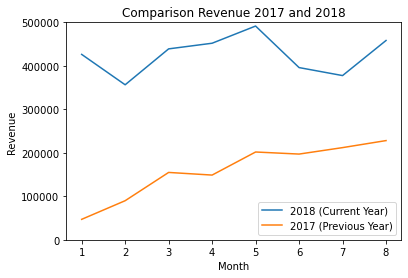

In [ ]:
sns.lineplot(x = trend_rev_yearly['month_2017'],
             y = trend_rev_yearly['total_revenue_2018'],
             palette = 'orange', label="2018 (Current Year)")
sns.lineplot(x = trend_rev_yearly['month_2017'],
             y = trend_rev_yearly['total_revenue_2017'],
             palette = 'blue', label="2017 (Previous Year)")
plt.legend()
plt.ylim(0, 500000)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Comparison Revenue 2017 and 2018")
plt.show()

## Monthly Trend Analysis Revenue
2017 - 2018

In [ ]:
# Query data
trend_rev_monthly = conn.execute("""
                WITH revenue_2017_2018 AS
                      (
                        SELECT
                          EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) as year,
                          EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) as month,
                          STRFTIME('%Y-%m', CAST(order_purchase_timestamp AS date)) AS month_year,
                          SUM(ord_pay.payment_value) AS total_revenue
                        FROM order_payments_dataset AS ord_pay
                        LEFT JOIN orders_dataset AS ords
                          ON ords.order_id = ord_pay.order_id
                        WHERE order_status NOT IN ('cancelled', 'unavailable')
                        GROUP BY 1, 2, 3
                        HAVING year > 2016 and month_year < '2018-09'
                        ORDER BY year asc, month asc
                      )
              SELECT * FROM revenue_2017_2018
              ;
            """).df()

trend_rev_monthly

,year,month,month_year,total_revenue
0,2017,1,2017-01,47065.98
1,2017,2,2017-02,89896.35
2,2017,3,2017-03,154909.96
3,2017,4,2017-04,148839.73
4,2017,5,2017-05,201896.01
5,2017,6,2017-06,197128.16
6,2017,7,2017-07,211969.34
7,2017,8,2017-08,228137.85
8,2017,9,2017-09,247207.23
9,2017,10,2017-10,259001.15


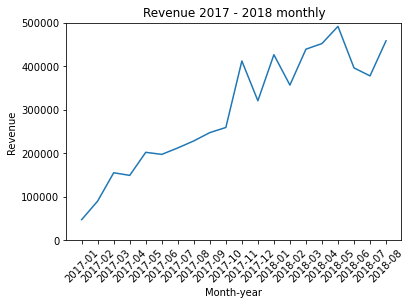

In [ ]:
sns.lineplot(x = trend_rev_monthly['month_year'],
             y = trend_rev_monthly['total_revenue'],
             palette = 'blue')
plt.ylim(0, 500000)
plt.xlabel("Month-year")
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.title("Revenue 2017 - 2018 monthly")
plt.show()

## Top and Bottom Product Sales


In [ ]:
# Query data
trend_prod = conn.execute("""
                SELECT
                  prod.product_category_name AS product_category,
                  COUNT(ord_itm.order_id) AS total_order
                FROM order_items_dataset AS ord_itm
                LEFT JOIN product_dataset AS prod
                  ON ord_itm.product_id = prod.product_id
                LEFT JOIN orders_dataset AS ords
                  ON ords.order_id = ord_itm.order_id
                WHERE
                  EXTRACT(year FROM CAST(shipping_limit_date AS date)) > 2016
                  AND EXTRACT(month FROM CAST(shipping_limit_date AS date)) < 9
                  AND order_status NOT IN ('cancelled', 'unavailable')
                GROUP BY 1;
            """).df()
# Sort data
trend_prod = trend_prod.sort_values(['total_order'], ascending=[False])
# Top 10 Product
trend_prod_top_10 = trend_prod.head(10)
trend_prod_top_10

,product_category,total_order
1,bed_bath_table,4142
8,health_beauty,3517
13,sports_leisure,2818
9,furniture_decor,2721
18,housewares,2669
7,computers_accessories,2665
4,watches_gifts,1720
15,auto,1432
17,telephony,1289
23,garden_tools,1117


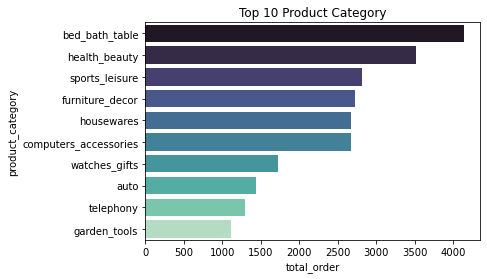

In [ ]:
sns.barplot(y='product_category',
            x='total_order',
            data=trend_prod_top_10, orient="h",
            palette='mako')
plt.title("Top 10 Product Category")
plt.show()

In [ ]:
# Bottom 10 Product
trend_prod_btm_10 = trend_prod.tail(10)
trend_prod_btm_10

,product_category,total_order
64,party_supplies,14
71,music,11
55,home_comfort_2,11
38,fashion_sport,10
66,flowers,9
39,portateis_cozinha_e_preparadores_de_alimentos,8
57,la_cuisine,5
48,pc_gamer,4
70,fashion_childrens_clothes,3
72,cds_dvds_musicals,2


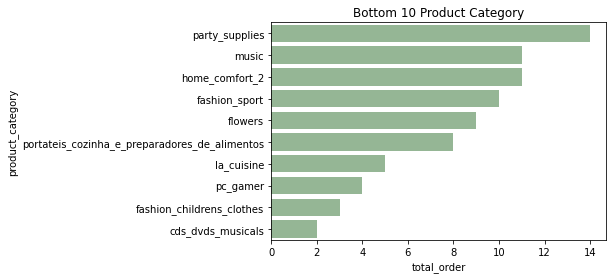

In [ ]:
sns.barplot(y='product_category',
            x='total_order',
            data=trend_prod_btm_10, orient="h",
            color='darkseagreen')
plt.title("Bottom 10 Product Category")
plt.show()

## Average Order Value


In [ ]:
# Query data
aov = conn.execute("""
                SELECT
                  EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) as year,
                  EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) as month,
                  STRFTIME('%Y-%m', CAST(order_purchase_timestamp AS date)) AS month_year,
                  SUM(ord_pay.payment_value) / COUNT(DISTINCT ord_pay.order_id) AS average_order_value
                FROM order_payments_dataset AS ord_pay
                LEFT JOIN orders_dataset AS ords
                  ON ords.order_id = ord_pay.order_id
                WHERE
                  EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) > 2016
                  AND EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) < 9
                  AND order_status NOT IN ('cancelled', 'unavailable')
                GROUP BY 1, 2, 3;
            """).df()
# Sort data
aov = aov.sort_values(['year', 'month'], ascending=[True, True])
aov

,year,month,month_year,average_order_value
14,2017,1,2017-01,159.006689
15,2017,2,2017-02,142.016351
9,2017,3,2017-03,154.909960
12,2017,4,2017-04,165.010787
13,2017,5,2017-05,143.087179
8,2017,6,2017-06,149.452737
0,2017,7,2017-07,133.819028
6,2017,8,2017-08,133.258090
10,2018,1,2018-01,140.993145
3,2018,2,2018-02,132.570803


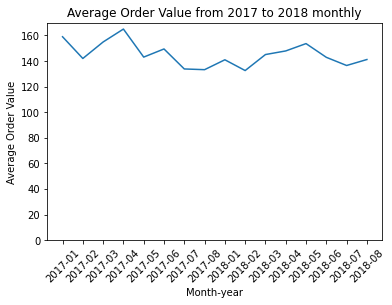

In [ ]:
sns.lineplot(x='month_year',
             y='average_order_value',
             data=aov)
plt.ylim(0, 170)
plt.xlabel("Month-year")
plt.xticks(rotation=45)
plt.ylabel("Average Order Value")
plt.title("Average Order Value from 2017 to 2018 monthly")
plt.show()

## Average price of product from this e-commerce

In [ ]:
# Average price of product from this e-commerce
# Overall
conn.execute("""
                SELECT
                  AVG(ord_itm.price) AS average_price
                FROM order_items_dataset AS ord_itm
                LEFT JOIN orders_dataset AS ords
                  ON ords.order_id = ord_itm.order_id
                WHERE
                  EXTRACT(year FROM CAST(shipping_limit_date AS date)) > 2016
                  AND EXTRACT(month FROM CAST(shipping_limit_date AS date)) < 9
                  AND order_status NOT IN ('cancelled', 'unavailable')
                ;
            """).df()

,average_price
0,109.526862


In [ ]:
# Average price of product from this e-commerce
# Based on each product_category
conn.execute("""
                SELECT
                  prod.product_category_name AS product_category,
                  AVG(ord_itm.price) AS average_price
                FROM order_items_dataset AS ord_itm
                LEFT JOIN product_dataset AS prod
                  ON ord_itm.product_id = prod.product_id
                LEFT JOIN orders_dataset AS ords
                  ON ords.order_id = ord_itm.order_id
                WHERE
                  EXTRACT(year FROM CAST(shipping_limit_date AS date)) > 2016
                  AND EXTRACT(month FROM CAST(shipping_limit_date AS date)) < 9
                  AND order_status NOT IN ('cancelled', 'unavailable')
                GROUP BY 1
                ORDER BY average_price DESC
                ;
            """).df()

,product_category,average_price
0,computers,803.737778
1,small_appliances_home_oven_and_coffee,484.570294
2,home_appliances_2,384.089041
3,musical_instruments,254.972044
4,agro_industry_and_commerce,239.490854
...,...,...
68,drinks,43.334138
69,food_drink,41.392673
70,home_comfort_2,38.007273
71,flowers,36.541111


## Most used payment_type and Average payment_sequantial

In [ ]:
# Most used payment type
conn.execute("""
                SELECT
                  payment_type,
                  COUNT(DISTINCT ord_pay.order_id) AS total_order
                FROM order_payments_dataset AS ord_pay
                LEFT JOIN orders_dataset AS ords
                  ON ords.order_id = ord_pay.order_id
                WHERE
                  EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) > 2016
                  AND EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) < 9
                  AND order_status NOT IN ('cancelled', 'unavailable')
                GROUP BY 1
                ORDER BY total_order DESC
                ;
            """).df()

,payment_type,total_order
0,credit_card,25113
1,boleto,6332
2,voucher,1222
3,debit_card,645
4,not_defined,2


In [ ]:
# Average payment sequantial
# By Payment Type
conn.execute("""
                SELECT
                  payment_type,
                  AVG(max_pay_seq) AS average_payment_sequential
                FROM (
                  SELECT
                    ord_pay.order_id,
                    ord_pay.payment_type,
                    MAX(ord_pay.payment_sequential) AS max_pay_seq
                  FROM order_payments_dataset AS ord_pay
                  LEFT JOIN orders_dataset AS ords
                    ON ords.order_id = ord_pay.order_id
                  WHERE
                    EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) > 2016
                    AND EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) < 9
                    AND order_status NOT IN ('cancelled', 'unavailable')
                  GROUP BY 1, 2
                ) AS pay_type_seq
                GROUP BY 1
                ;
            """).df()

,payment_type,average_payment_sequential
0,credit_card,1.003186
1,boleto,1.000000
2,debit_card,1.024806
3,voucher,2.125205
4,not_defined,1.000000


## Product Category Bought Together



In [ ]:
# product category Bought Together
# https://stackoverflow.com/questions/18578216/finding-products-that-customers-bought-together
prod_bought_together = conn.execute("""
                      WITH ord_item_use AS (
                          SELECT
                            ord_itm.order_id,
                            prod.product_category_name,
                            COUNT(prod.product_category_name) AS total_order,
                            rank() over(partition by ord_itm.order_id) AS rank_prod
                          FROM order_items_dataset AS ord_itm
                          LEFT JOIN product_dataset AS prod
                            ON ord_itm.product_id = prod.product_id
                          LEFT JOIN orders_dataset AS ords
                            ON ords.order_id = ord_itm.order_id
                          WHERE
                            EXTRACT(year FROM CAST(shipping_limit_date AS date)) > 2016
                            AND EXTRACT(month FROM CAST(shipping_limit_date AS date)) < 9
                            AND order_status NOT IN ('cancelled', 'unavailable')
                          GROUP BY
                            1, 2
                          HAVING
                            total_order > 1
                      )
                      SELECT *
                      FROM
                       ord_item_use
                      ;
                  """).df()

prod_bought_together.sample(10)

,order_id,product_category_name,total_order,rank_prod
1205,322d561e43a3a0c5887b628a62cb69ab,telephony,2,1
2165,05fcd933547be81890bc4d62357fdf3f,computers_accessories,4,1
1831,40e4b27fe658a1c1e627e503b29ef734,housewares,2,1
2402,57313d913bef6f44066214ef78d4ca65,stationery,2,1
583,15d19cc3fdb1b3bdea39f23b8f3a7a11,health_beauty,4,1
2704,bc23a4f24db6f84f1efcfe44847ba135,housewares,3,1
473,783c795ca45c01ac1ebe459d8c26751d,computers_accessories,3,1
303,a1123c93471aa08ec72dfd5c941edcdc,fashio_female_clothing,5,1
800,491f5fabbd1c4d86ab4ae7a2024d7368,furniture_decor,2,1
714,c6122e6a623a45c8dfc876f10733682f,small_appliances,2,1


In [ ]:
# product category Bought Together
# https://stackoverflow.com/questions/18578216/finding-products-that-customers-bought-together
prod_bundling = conn.execute("""
                      WITH ord_item_price AS (
                          SELECT
                            ord_itm.order_id,
                            prod.product_category_name,
                            COUNT(prod.product_category_name) AS total_order,
                            SUM(ord_itm.price) AS total_price
                          FROM order_items_dataset AS ord_itm
                          LEFT JOIN product_dataset AS prod
                            ON ord_itm.product_id = prod.product_id
                          LEFT JOIN orders_dataset AS ords
                            ON ords.order_id = ord_itm.order_id
                          WHERE
                            EXTRACT(year FROM CAST(shipping_limit_date AS date)) > 2016
                            AND EXTRACT(month FROM CAST(shipping_limit_date AS date)) < 9
                            AND order_status NOT IN ('cancelled', 'unavailable')
                          GROUP BY 1, 2
                          HAVING total_order > 1
                      )
                      SELECT
                        product_category_name,
                        AVG(total_order) AS average_order,
                        SUM(total_order) AS total_order,
                        AVG(total_price) AS average_price
                      FROM ord_item_price
                      GROUP BY 1
                      ORDER BY total_order DESC
                      ;
                  """).df()

prod_bundling

,product_category_name,average_order,total_order,average_price
0,bed_bath_table,2.329293,1153.0,173.642949
1,furniture_decor,2.562827,979.0,160.931492
2,computers_accessories,2.556391,680.0,283.612068
3,housewares,2.556000,639.0,147.547720
4,health_beauty,2.366038,627.0,161.400189
...,...,...,...,...
61,tablets_printing_image,2.000000,2.0,205.800000
62,la_cuisine,2.000000,2.0,280.000000
63,fashion_underwear_beach,2.000000,2.0,11.800000
64,arts_and_craftmanship,2.000000,2.0,58.900000


In [ ]:
# Commit the changes
conn.commit()

In [ ]:
# close the connection
conn_p.close()
conn_d.close()

# Reference

ETL
- Connect, read & write postgreSQL to Duckdb and Psycopg2
- https://duckdb.org/2022/09/30/postgres-scanner
- https://www.geeksforgeeks.org/how-to-insert-a-pandas-dataframe-to-an-existing-postgresql-table/
- https://github.com/NaysanSaran/pandas2postgresql/blob/master/notebooks/Psycopg2_Bulk_Insert_Speed_Benchmark.ipynb
- https://www.datacamp.com/blog/an-introduction-to-duckdb-what-is-it-and-why-should-you-use-it
- https://duckdb.org/docs/data/csv/tips.html
- https://duckdb.org/docs/guides/meta/list_tables.html
- https://duckdb.org/docs/guides/python/import_pandas.html
- https://www.youtube.com/watch?v=W-8tEFAWD5A
- https://stackoverflow.com/questions/71797515/how-to-read-loop-through-multiple-csv-files-in-a-folder-using-google-colab-pyth
- https://www.dataquest.io/blog/tutorial-connect-install-and-query-postgresql-in-python/

Product Sales Analysis
- https://ppcexpo.com/blog/sales-data-analysis-examples
-https://www.magicbean.ai/articles/finding-products-that-are-frequently-bought-together
- https://chartexpo.com/blog/year-over-year-growth-chart
- https://glints.com/id/lowongan/average-order-value/
- https://stackoverflow.com/questions/18578216/finding-products-that-customers-bought-together
- https://www.shopify.com/id/blog/average-order-value